In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/пп/Titanic.csv"))

# EDA, ресерч, Feature Engineering

##Предобработка данных

посмотрим на данные которые у нас есть, что они из себя представляют. какие-то изменим для большего удобства. столбцы, которые ни как не вляют на выживаемость удалим: PassengerId, Name, Ticket.

Описнаие все столбцов датасета:

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший).

Name — имя.

Sex — пол (мужчина или женщина).

Age — возраст (количество полных лет). Для детей меньше 1 года — дробное.

SibSp — количество братьев, сестёр, сводных братьев, сводных сестёр, супругов на борту титаника.

Parch — количество родителей, детей (в том числе приёмных) на борту титаника.

Ticket — номер билета.

Fare — плата за проезд.

Cabin — каюта.

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

Survived — признак, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


посмотрим на пропуски в значением и избавимся от них, если такие есть

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


пропуски есть в трех столбцах: Age, Cabin, Embarked

в столбце Age пропуски заполним медианным знаечнием

в столбце Embarked пропуски заполним модой

в столбце Cabin преобразуем данные таким образом, чтобы у нас появился категориальный признак: 0 - нет кабины, 1 - есть кабина.

In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop('Cabin', axis=1, inplace=True)

<ipython-input-10-b52dc8cb9670>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-10-b52dc8cb9670>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Проверим на выбросы категориальные признаки

In [11]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [12]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [13]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [14]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


выбросов в категориальных данных не оказалось

проверим на выбросы числовые данные

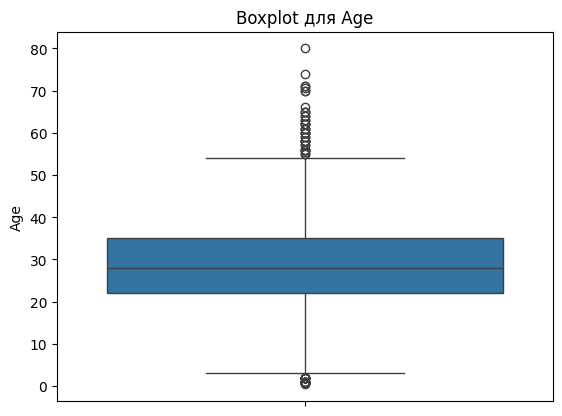

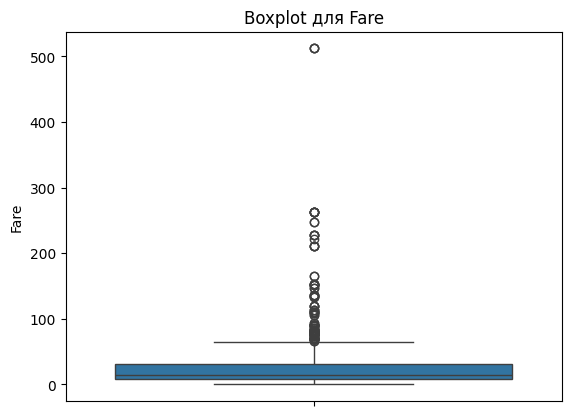

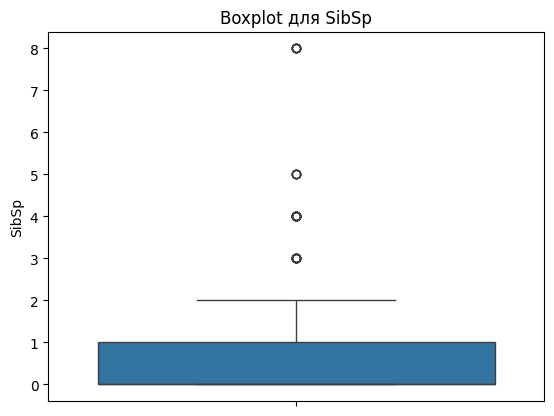

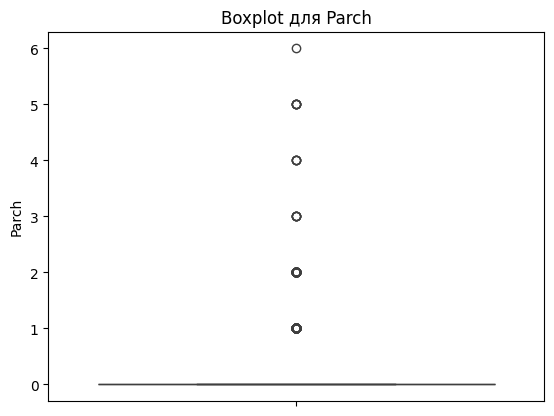

In [15]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot для {col}')
    plt.show()

выбросами кажутся только данные в столбце Fare. Поэтому оставим только те, которые больше первого квартиля и меньше третьего квартиля.

In [16]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[((df['Fare'] < Q3) & (df['Fare'] > Q1))]

переделаем категориальные данные из строк в числа для большего удобства и вычленим из имени титулы пассажиров. в титулах оставим только самы распрастраненые, те, которых мало, соединим в одну группу.

In [17]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace([
    'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr',
    'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'
], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df['Title'] = df['Title'].map({'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4})

<ipython-input-17-32ff0e499db7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
<ipython-input-17-32ff0e499db7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
<ipython-input-17-32ff0e499db7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [18]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


удаляем столбцы, которые никак не повлияют на выживаемость пассажиров

In [19]:
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

<ipython-input-19-08a843665fb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


составим матрицу корреляции, для написания гипотез

<Axes: >

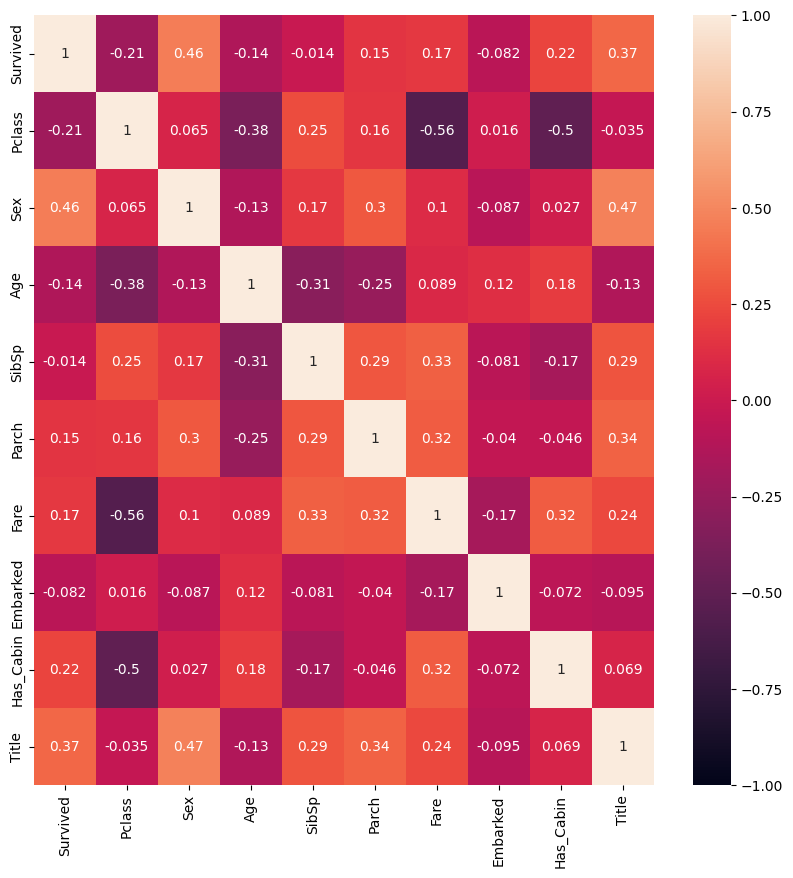

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, ax=ax)

## Гипотезы
1. Выживаемость людей зависит от пола. По моральным соображением первых спасают женщин и детей
2. Выживаемость зависит от класса, которым люди путешествовали. Первому и второму классу на титанике было легче добраться до спасательных шлюпок, чем третьему
3. Выживаемость зависит от возраста человека. Принято в первую очередь спасать молодых, детей, так как у них вся жизнь впереди, зачастую даже сами старики просят себя не спасать.
4. Выживаемость зависит от того, один человек путешествовал или с родственниками. Если человеку кто-то помогает, то шансы на выживание увеличиваются.
5. Выживаемость зависит от того, насколько у человека большая семья. Выживаемсть с большой семьей ниже, так как человек будет пытаться спасти всех.
6. Выживаемость зависит от порта, где сел человек. Возможно водном из портов садились более состоятельные люди.
7. Пассажиры старшего возраста чаще покупали билеты первого класса.Возможно они имеют больше накопление или стабильный доход.
8. Пассажиры с более дорогими билетами ехали с меньшим количеством родственников.
9. Женщины платили за билеты больше чем мужчины.Возможно женщины чаще путешуствовали с детьми, поэтому стоимость билета выше.
10. Женщины чаще путешествовали с детьми, а мужчины с женами.
11. Мужчины чаще путешествовали в одночку.


###1 гипотеза
Выживаемость людей зависит от пола

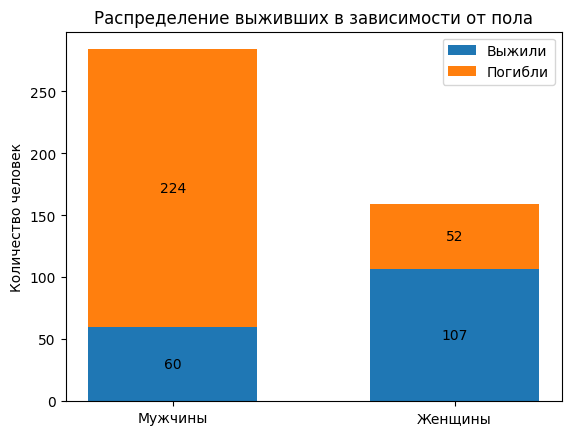

In [21]:
males_total = len(df.loc[(df['Sex'] == 0)])
females_total = len(df.loc[(df['Sex'] == 1)])
males_survived = len(df.loc[((df['Sex'] == 0) & (df['Survived'] == 1))])
females_survived = len(df.loc[((df['Sex'] == 1) & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [males_survived, females_survived],
    'Погибли': [males_total-males_survived, females_total-females_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(2)

for key, count in survivors_counts.items():
    p = ax.bar(('Мужчины', 'Женщины'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

#### Вывод
Процент выживших мужчин в своей группе: 60 / (224 + 60) = 0,21 = 21%
<p>Процент выживших женщин в своей группе: 107 / (107 + 52) = 0,67 = 67%</p>
<p>Несмотря на то, что мужчин на корабле было сильно больше женщин, их процент выживаемости более чем в 3 раза ниже в сравнении с женщинами.
Данные однозначно подтверждают гипотезу о том, что выживаемость пассажиров на корабле существенно зависела от пола. Повлиял на это, вероятно, спасательный протокол “женщины и дети (гипотезу о спасении детей рассмотрим далее) в первую очередь”.</p>

###2 Гипотеза
Выживаемость зависит от класса, которым люди путешествовали.

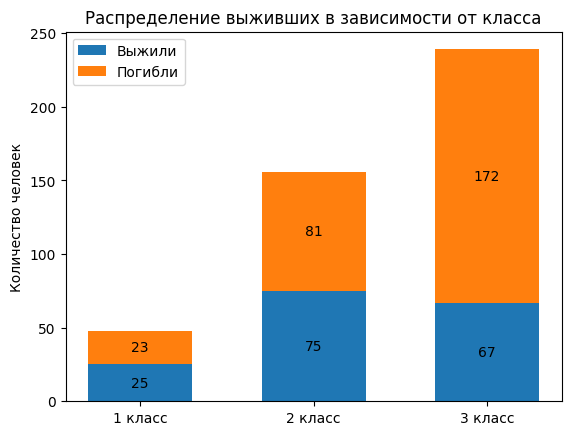

In [22]:
first_class_total = len(df.loc[(df['Pclass'] == 1)])
second_class_total = len(df.loc[(df['Pclass'] == 2)])
third_class_total = len(df.loc[(df['Pclass'] == 3)])

first_class_survived = len(df.loc[((df['Pclass'] == 1) & (df['Survived'] == 1))])
second_class_survived = len(df.loc[((df['Pclass'] == 2) & (df['Survived'] == 1))])
third_class_survived = len(df.loc[((df['Pclass'] == 3) & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [first_class_survived, second_class_survived, third_class_survived],
    'Погибли': [first_class_total-first_class_survived, second_class_total-second_class_survived, third_class_total-third_class_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(('1 класс', '2 класс', '3 класс'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от класса')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

#### Вывод
Процент выживших в 1-ом классе: 25 / (25 + 23) = 0,52 = 52%
<p>Процент выживших во 2-ом классе: 75 / (75 + 81) = 0,48 = 48%</p>
<p>Процент выживших в 3-ем классе: 67 / (67 + 172) = 0,28 = 28%</p>
<p>Можем заметить, что третьего класса на корабле было больше, чем первого и второго в сумме, но выживаемость в процентном соотношении у людей из третьего класса почти в 2 раза меньше, чем у первого и более чем в 1,5 раза меньше, чем у второго.</p>
<p>Данные подтверждают гипотезу о том, что выживаемость зависела от класса, которым люди путешествовали. Первому и второму классу на Титанике было легче добраться до спасательных шлюпок, чем третьему.</p>

###3 Гипотеза
Выживаемость зависит от возраста человека.

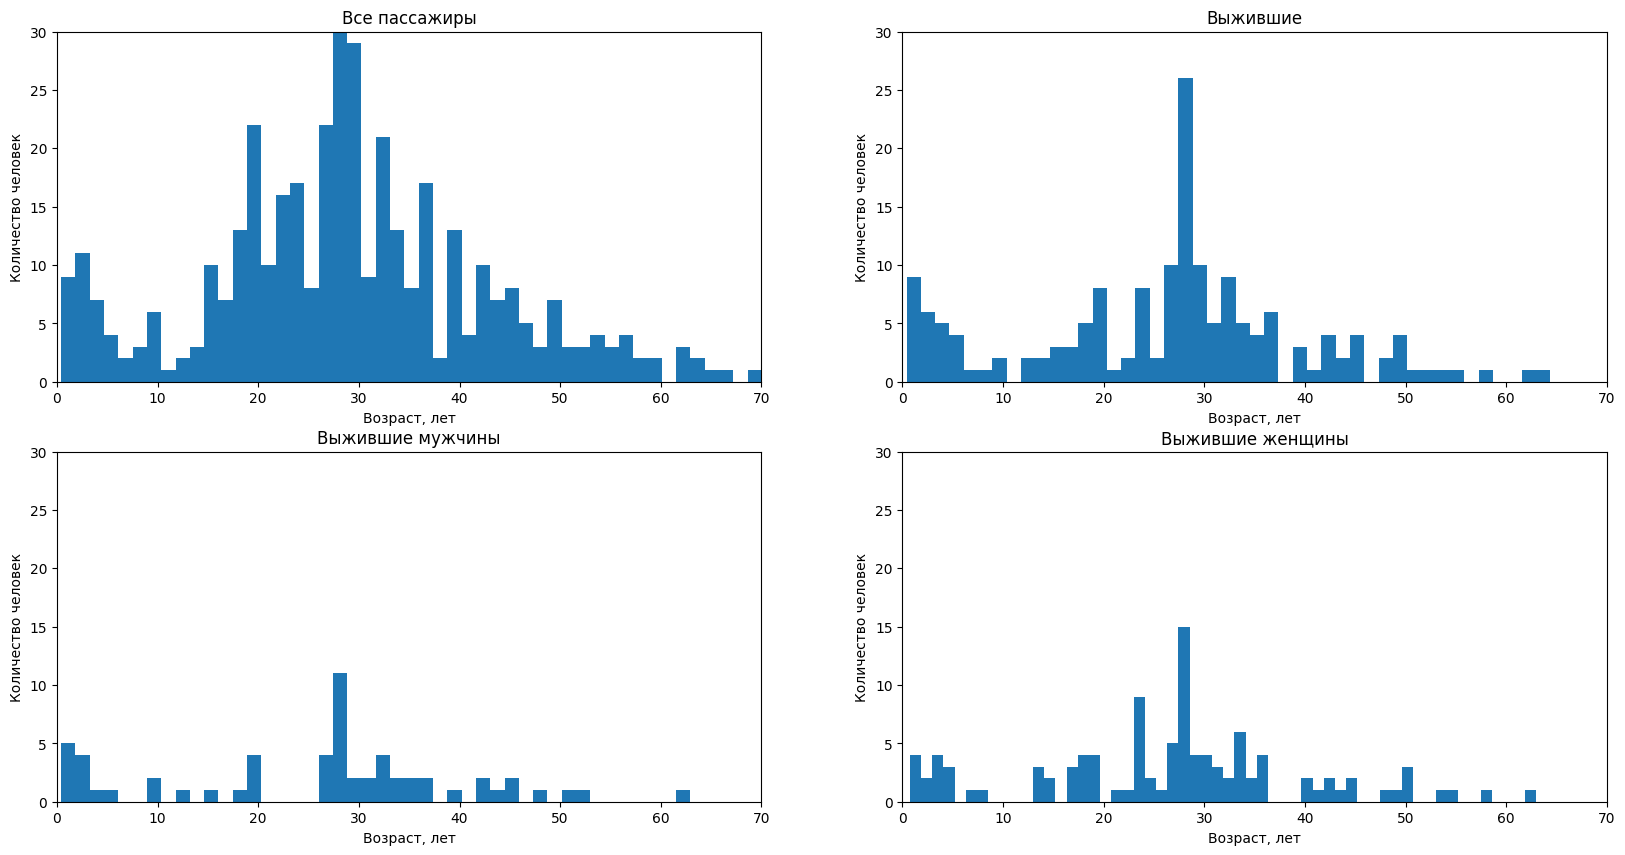

In [23]:
survivors = df.loc[(df['Survived'] == 1)]
male_survivors = df.loc[((df['Sex'] == 0) & (df['Survived'] == 1))]
female_survivors = df.loc[((df['Sex'] == 1) & (df['Survived'] == 1))]

#Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

#Визуализируем
fig, axs = plt.subplots(2,2)
fig.set_figwidth(20)
fig.set_figheight(10)
names = [['Все пассажиры', 'Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
for i, surv in enumerate([[df, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages)
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0,30)
        axs[i][j].set_xlim(0,70)
plt.show()

In [24]:
children = df.loc[((df['Age'] < np.float64(18.0)) & (df['Age'] > 0))]
survivors_children = df.loc[((df['Age'] < np.float64(18.0)) & (df['Survived'] == 1) & (df['Age'] > 0))]
print(f'Пасажиров до 18 лет спаслось {round(len(survivors_children)*100/len(children), 2)}%')

Пасажиров до 18 лет спаслось 58.46%


<Axes: >

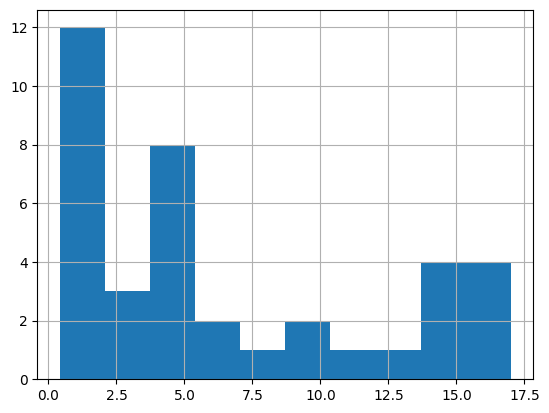

In [25]:
df.loc[((df['Survived'] == 1) & (df['Age'] > 0) & (df['Age'] < 18))].Age.hist()

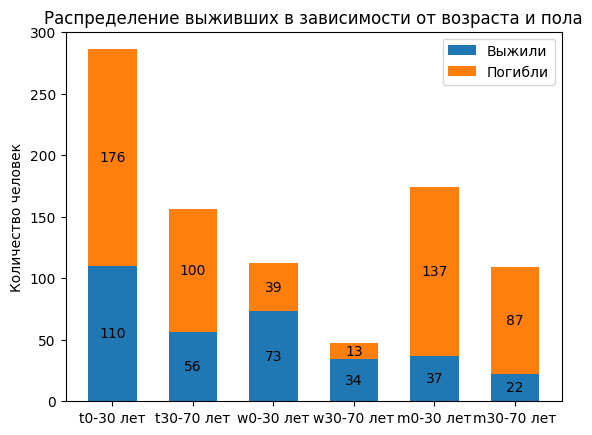

In [26]:
total_0_30 = len(df[(df['Age'] <= 30)])
total_survived_0_30 = len(df[(df['Age'] <= 30) & (df['Survived'] == 1)])

total_30_70 = len(df[(df['Age'] > 30) & (df['Age'] <= 70)])
total_survived_30_70 = len(df[(df['Age'] > 30) & (df['Age'] <= 70) & (df['Survived'] == 1)])

women_0_30 = len(df[(df['Age'] <= 30) & (df['Sex'] == 1)])
women_survived_0_30 = len(df[(df['Age'] <= 30) & (df['Sex'] == 1) & (df['Survived'] == 1)])
women_30_70 = len(df[(df['Age'] > 30) & (df['Age'] <= 70) & (df['Sex'] == 1)])
women_survived_30_70 = len(df[(df['Age'] > 30) & (df['Age'] <= 70) & (df['Survived'] == 1) & (df['Sex'] == 1)])

men_0_30 = len(df[(df['Age'] <= 30) & (df['Sex'] == 0)])
men_survived_0_30 = len(df[(df['Age'] <= 30) & (df['Sex'] == 0) & (df['Survived'] == 1)])
men_30_70 = len(df[(df['Age'] > 30) & (df['Age'] <= 70) & (df['Sex'] == 0)])
men_survived_30_70 = len(df[(df['Age'] > 30) & (df['Age'] <= 70) & (df['Survived'] == 1) & (df['Sex'] == 0)])


survivors_counts = {
    'Выжили': [total_survived_0_30, total_survived_30_70, women_survived_0_30, women_survived_30_70, men_survived_0_30, men_survived_30_70],
    'Погибли': [total_0_30 - total_survived_0_30, total_30_70 - total_survived_30_70, women_0_30 - women_survived_0_30, women_30_70 - women_survived_30_70, men_0_30 - men_survived_0_30, men_30_70 - men_survived_30_70]
}

fig, ax = plt.subplots()
bottom = np.zeros(6)
for key, count in survivors_counts.items():
    p = ax.bar(('t0-30 лет', 't30-70 лет', "w0-30 лет", "w30-70 лет", "m0-30 лет", "m30-70 лет"),count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от возраста и пола')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

#### Вывод
Процент общей выживаемости молодых в своей группе(0-30 лет): 110 / (110 + 176) = 0,38 = 38%
<p>Процент общей выживаемости взрослых-пожилых в своей группе(30-70 лет): 56 / (56 + 100) = 0,56 = 56%</p>
<p>Процент выживаемости молодых женщин в своей группе(0-30 лет): 73 / (73 + 39) = 0,65 = 65%</p>
<p>Процент выживаемости взрослых женщин в своей группе(30-70 лет): 34 / (34 + 13) = 0,72 = 72%</p>
<p>Процент выживаемости молодых мужчин в своей группе(0-30 лет): 37 / (37 + 137) = 0,21 = 21%</p>
<p>Процент выживаемости взрослых мужчин в своей группе(30-70 лет): 22 / (22 + 87) = 0,20 = 20%</p>
<p>Процент выживаемости детей = 58,46%</p>
<p>Можно заметить, что общая выживаемость взрослых и пожилых людей в своей группе выше, чем значение выживаемости молодых. Однако это обусловлено тем, что бОльшую часть молодых пассажиров занимают мужчины, процент выживаемости которых является вторым по меньшинству среди всех подгрупп = 21%. В это время процент выживаемости молодых женщин = 65%, что в 3 раза выше показателя для группы молодых мужчин. Это позволяет говорить о том, что спасение молодых женщин было более приоритетным, чем спасение молодых мужчин. Если рассматривать взрослую и пожилую группу, то для мужчин процент выживаемости составляет всего 20%, а для женщин - целых 72%. Это данные дают понять, что спасение взрослых и пожилых мужчин не было приоритетным.</p>
<p>Процент выживаемости детей отдельно от группы молодых(0-30 лет) составляет значение больше 50%. Таким образом, данные подтверждают гипотезы о том, что сначала спасают женщин, молодых и детей, а спасение взрослых и пожилых людей (в частности мужчин) не стоит в приоритете.</p>


###4 Гипотеза
Выживаемость зависит от того, один человек путешествовал или с родственниками.

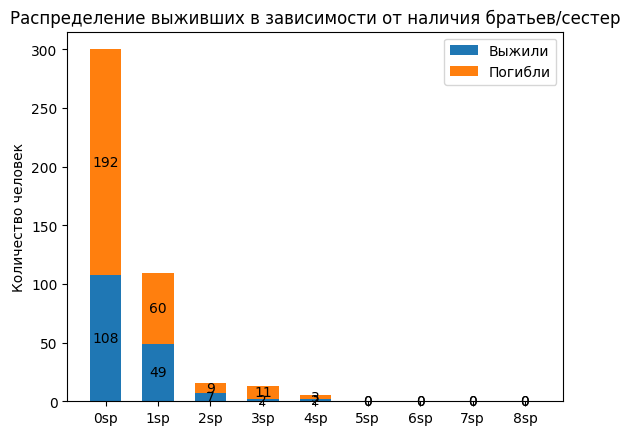

In [27]:
SibSp0_total = len(df.loc[(df['SibSp'] == 0)])
SibSp1_total = len(df.loc[(df['SibSp'] == 1)])
SibSp2_total = len(df.loc[(df['SibSp'] == 2)])
SibSp3_total = len(df.loc[(df['SibSp'] == 3)])
SibSp4_total = len(df.loc[(df['SibSp'] == 4)])
SibSp5_total = len(df.loc[(df['SibSp'] ==5)])
SibSp6_total = len(df.loc[(df['SibSp'] == 6)])
SibSp7_total = len(df.loc[(df['SibSp'] == 7)])
SibSp8_total = len(df.loc[(df['SibSp'] == 8)])

SibSp0_survived = len(df.loc[((df['SibSp'] == 0) & (df['Survived'] == 1))])
SibSp1_survived = len(df.loc[((df['SibSp'] == 1) & (df['Survived'] == 1))])
SibSp2_survived = len(df.loc[((df['SibSp'] == 2) & (df['Survived'] == 1))])
SibSp3_survived = len(df.loc[((df['SibSp'] == 3) & (df['Survived'] == 1))])
SibSp4_survived = len(df.loc[((df['SibSp'] == 3) & (df['Survived'] == 1))])
SibSp5_survived = len(df.loc[((df['SibSp'] == 5) & (df['Survived'] == 1))])
SibSp6_survived = len(df.loc[((df['SibSp'] == 6) & (df['Survived'] == 1))])
SibSp7_survived = len(df.loc[((df['SibSp'] == 7) & (df['Survived'] == 1))])
SibSp8_survived = len(df.loc[((df['SibSp'] == 8) & (df['Survived'] == 1))])

#Визуализируем
survivors_counts = {
    'Выжили': [SibSp0_survived,
               SibSp1_survived,
               SibSp2_survived,
               SibSp3_survived,
               SibSp4_survived,
               SibSp5_survived,
               SibSp6_survived,
               SibSp7_survived,
               SibSp8_survived],
    'Погибли': [SibSp0_total-SibSp0_survived,
                SibSp1_total-SibSp1_survived,
                SibSp2_total-SibSp2_survived,
                SibSp3_total-SibSp3_survived,
                SibSp4_total-SibSp4_survived,
                SibSp5_total-SibSp5_survived,
                SibSp6_total-SibSp6_survived,
                SibSp7_total-SibSp7_survived,
                SibSp8_total-SibSp8_survived]
}

fig, ax = plt.subplots()
bottom = np.zeros(9)

for key, count in survivors_counts.items():
    p = ax.bar(('0sp', '1sp', '2sp', '3sp', '4sp', '5sp', '6sp', '7sp', '8sp'), count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от наличия братьев/сестер')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

#### Вывод
Процент выживаемости людей с 0 родственниками: 108 / (192 + 108) = 0,36 = 36%
<p>Процент выживаемости людей с хотя бы 1 родственником: (49 + 7 + 4 + 2) / (49 + 60 + 9 + 7 + 2 + 11 + 2 + 2) = 0,43 = 43%</p>
<p>Процент выживаемости людей с 1 родственником: 49 / (60 + 49) = 0,45 = 45%</p>
<p>Процент выживаемости людей с 2 родственниками: 7 / (7 + 9) = 0,44 = 44%</p>
<p>Процент выживаемости людей с 3 родственниками: 2 / (2 + 11) = 0,15 = 15%</p>
<p>Процент выживаемости людей с 4 родственниками: 2 / (2 + 2) = 0,50 = 50%</p>
<p>Заметим, что процент выживаемости у людей, которые путешествовали одни, ниже, чем у тех, кто путешествовал с 1-2 родственниками(45% и 44% соответственно). Процент выживаемости немного выше для пассажиров с одним или двумя родственниками (45% и 44% соответственно). Это может подтверждать гипотезу о том, что небольшая компания и наличие взаимопомощи могли способствовать выживанию.</p>
<p>Однако процент выживаемости пассажиров с тремя родственниками резко падает до 15%. Это может быть связано с тем, что забота о большем количестве людей значительно усложняла процесс спасения и снижала индивидуальные шансы на выживание.</p>
<p>Высокий процент выживаемости для людей с 4 родственниками нельзя считать объективным, поскольку выборка для этой категории очень мала в сравнении с остальными категориями. </p>


### 5 Гипотеза
Выживаемость зависит от того, насколько у человека большая семья.

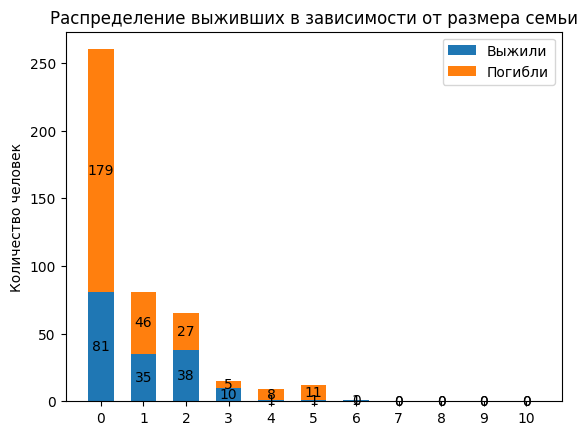

In [28]:
#Проверим гипотезу: выживаемость зависит от количества родственников в общем(сестры\братья, дети\родители)
df['FamilySize'] = df['SibSp'] + df['Parch']
total_count = []
survived_count = []
died_count= []
for size in range(0,11):
  total = len(df[df['FamilySize'] == size])
  survived = len(df[(df['FamilySize'] == size) & (df['Survived'] == 1)])

  total_count.append(total)
  survived_count.append(survived)
  died_count.append(total - survived)


#Визуализируем
survivors_counts = {
    'Выжили': survived_count,

    'Погибли':died_count
}

fig, ax = plt.subplots()
bottom = np.zeros(11)

for key, count in survivors_counts.items():
    p = ax.bar([str(size) for size in range(0,11)], count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от размера семьи')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

####Вывод

Процент выживаемости людей с 0 родственниками: 81 / (179 + 81) = 0,31 = 31%

Процент выживаемости людей с хотя бы 1 родственником: (35 + 38 + 10 + 1+1) / (35+46+38+27+5+10+1+8 + 1 + 11) = 0,47 = 47%

Процент выживаемости людей с 1 родственником: 35 / (35 + 46) = 0,43 = 43%

Процент выживаемости людей с 2 родственниками: 38 / (38 + 27) = 0,58 = 58%

Процент выживаемости людей с 3 родственниками: 10 / (10 + 5) = 0,67 = 67%

Процент выживаемости людей с 4 родственниками: 1 / (1 + 8) = 0,11 = 11%

Процент выживаемости людей с 5 родственниками: 1 / (1 + 11) = 0,08 = 8%

Процент выживаемости людей с 6 родственниками: 1 / (1 + 0) = 1 = 100%


Заметим, что процент выживаемости у людей, которые путешествовали одни, ниже, чем у тех, кто путешествовал с 1-3 родственниками(43% и 58%, 67% соответственно). Процент выживаемости немного выше для пассажиров с одним, двумя или тремя родственниками (43%, 58% и 67% соответственно). Это может подтверждать гипотезу о том, что небольшая компания и наличие взаимопомощи могли способствовать выживанию.

Однако процент выживаемости пассажиров с четырьмя или пятью родственниками резко падает до 11% и 8% соответсвенно. Это может быть связано с тем, что забота о большем количестве людей значительно усложняла процесс спасения и снижала индивидуальные шансы на выживание.

Высокий процент выживаемости для людей с 6 родственниками нельзя считать объективным, поскольку выборка для этой категории очень мала в сравнении с остальными категориями


###6 Гипотеза

Выживаемость зависит от порта, где сел человек.

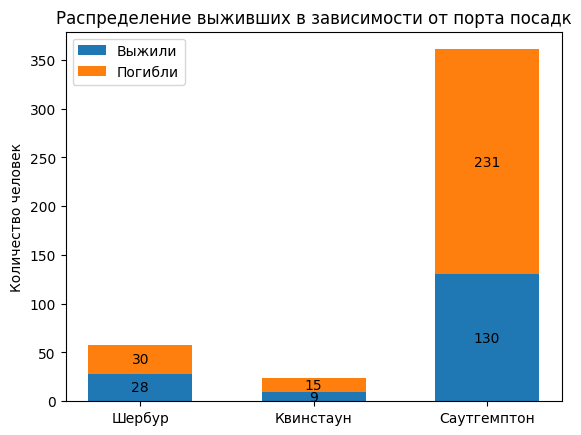

In [29]:
#проверим гипотезу про порты
moda_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(moda_port)

ports = df['Embarked'].unique().tolist()
ports.sort()
survived_count = []
died_count = []

for port in ports:
  df_port = df[df['Embarked'] == port]
  total = len(df_port)
  survived = len(df_port[df_port['Survived'] == 1])

  survived_count.append(survived)
  died_count.append(total - survived)


#Визуализируем
survivors_counts = {
    'Выжили': survived_count,

    'Погибли':died_count
}
port_names = {
    0: 'Шербур',
    1: 'Квинстаун',
    2: 'Саутгемптон'
}
port_labels = [port_names[port] for port in ports]

fig, ax = plt.subplots()
bottom = np.zeros(3)

for key, count in survivors_counts.items():
    p = ax.bar(port_labels, count, width=0.6, label=key, bottom=bottom)
    bottom += count
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение выживших в зависимости от порта посадк')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

####Вывод

Процент выживших, севших в Шербуре: 28 / (28 + 30) = 0,48 = 48%

Процент выживших, севшх в Квинстауне: 9 / (9 + 15) = 0,375 = 37,5%

Процент выживших, севших в Саутгемптоне: 130 / (130 + 231) = 0,36 = 36%

Несмотря на то, что в Саутгемптоне на корабль село больше всего людей, его выжимваемость в процентном соотношении не сильно отличается от шансов на выживание людей, севших в других портах.

Данные подтверждают нашу гипотезу о том, что порт посадки влияет на выживаемость, однако больше внимания стоит уделить классу, полу и возрасту.

###7 Гипотеза
Пассажиры старшего возраста чаще покупали билеты первого класса.

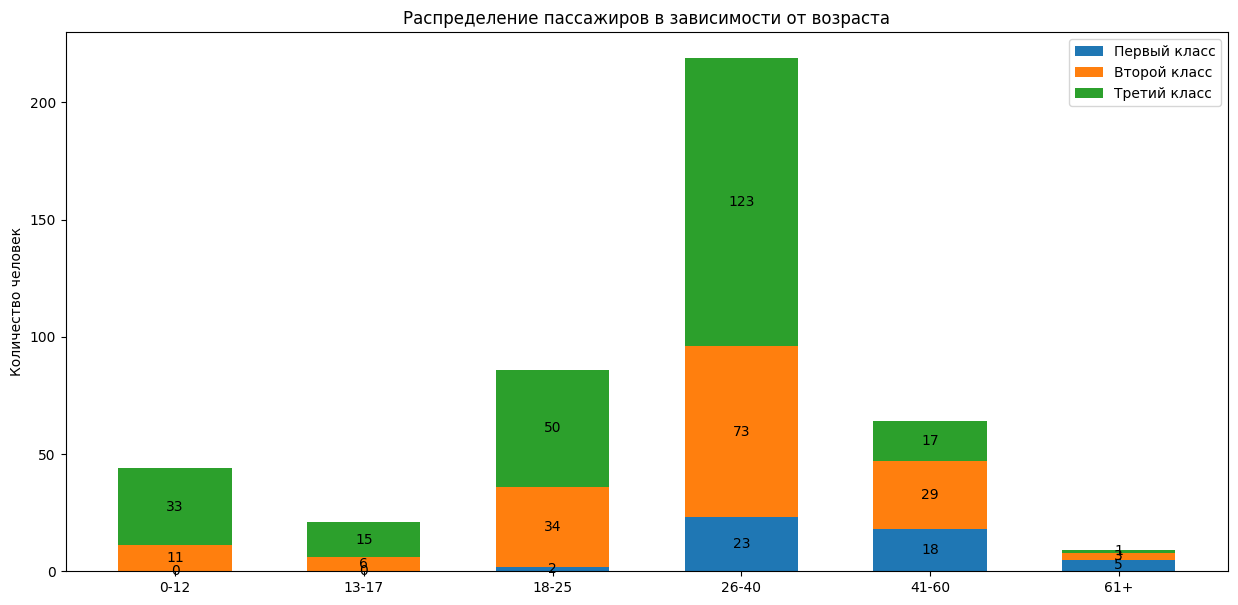

In [30]:
#Проверим гипотезу о том, что пассажиры старшего возраста чаще покупали билеты первого класса
median_age = df['Age'].median()
df['Age'].fillna(median_age)

bins = [0,13,18,26,41,61, df['Age'].max() + 1]
labels = ['0-12', '13-17', '18-25', '26-40', '41-60', '61+']

df['Age_group'] = pd.cut(df['Age'], bins = bins, labels = labels, right = False, include_lowest = True)

pclass_count = df.groupby(['Age_group', 'Pclass'], observed=False).size().unstack(fill_value = 0)

age_labels = pclass_count.index.tolist()

#Визуализируем

pclass_names = {
    1 : 'Первый класс',
    2: 'Второй класс',
    3: 'Третий класс'
}


fig, ax = plt.subplots(figsize = (15,7))
bottom = np.zeros(len(pclass_count))

for pclass in sorted(pclass_count.columns):
    counts = pclass_count[pclass].values
    key = pclass_names[pclass]
    p = ax.bar(age_labels, counts, width=0.6, label=key, bottom=bottom)
    bottom += counts
    ax.bar_label(p, label_type='center')

ax.set_title('Распределение пассажиров в зависимости от возраста')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

####Вывод

Процент людей, купивших билеты в 1 класс в возрастной категории от 0 до 12 лет составляет 0 процентов

Процент людей, купивших билеты в 1 класс в возрастной категории от 13 до 17 лет составляет 0 процентов

Процент людей, купивших билеты в 1 класс в возрастной категории от 18 до 25 лет составляет 2\(2+34+50) = 0,02 = 2%

Процент людей, купивших билеты в 1 класс в возрастной категории от 26 до 40 лет составляет 23\(23+73+123) = 0,011 = 11%

роцент людей, купивших билеты в 1 класс в возрастной категории от 41 до 60 лет составляет 18\(29+18+17) = 0,28 = 28%

Процент людей, купивших билеты в 1 класс в возрастной категории старше 61 составляет 5\(5+3+1) = 0,56 = 56%

Заметим, что процент людей, купивших билеты в первый класс в возрастной категории 41 - 60 лет (28%) выше, чем у людей в возрастных категориях 0-12 лет, 13 - 17, 18-25 лет, 26 - 40 лет (0%, 0%, 2%, 11% соответсвенно).
Это может подтвержать гипотезу о том, что пассажиры старшего возраста чаще покупали билет в первый класс.

Высокий процент выживаемости для людей,находящихся в возрастной категории 61+ нельзя считать объективным, поскольку выборка для этой категории очень мала в сравнении с остальными категориями

###8 Гипотеза

Пассажиры с более дорогими билетами ехали с меньшим количеством родственников.

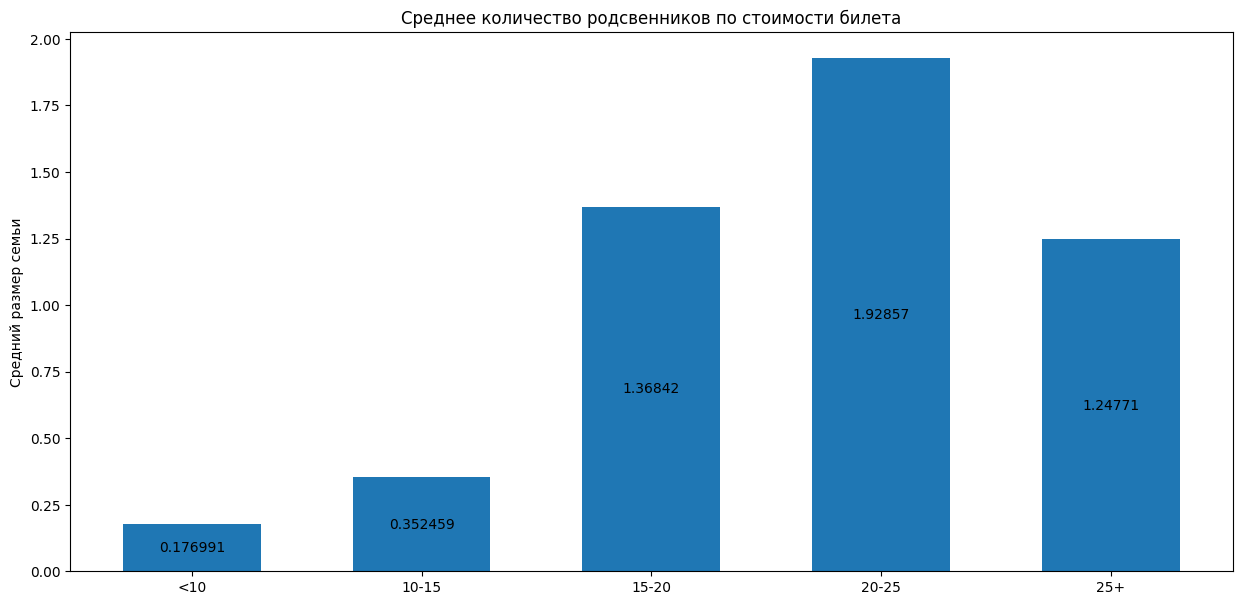

In [31]:
#Проверим гипотезу о том, что пассажиры с более дорогими билетами ехали с меньшим количеством родственников.
median_fare = df['Fare'].median()
df['Fare'] = df['Fare'].fillna(median_fare)

fare_bins = [0,10,15,20,25, np.inf]
fare_labels = ['<10', '10-15','15-20','20-25','25+']

df['Fare_Bin'] = pd.cut(df['Fare'], bins = fare_bins ,labels = fare_labels,right=True, include_lowest=True)


avg_relatives = df.groupby('Fare_Bin', observed= False)['FamilySize'].mean()

fare_cat = avg_relatives.index.astype(str)

#Визуализируем
fig, ax = plt.subplots(figsize = (15,7))

p = ax.bar(fare_cat, avg_relatives.values, width=0.6)

ax.bar_label(p, label_type='center')

ax.set_title('Среднее количество родсвенников по стоимости билета')
ax.set_ylabel('Средний размер семьи')

plt.show()

####Вывод

Заметим, что у людей, купивших более дорогие билеты, средний размер семьи выше, чем у людей, которые приобрели билеты по более дешевым ценам.

Значит, можно сделать выводы, что наша гипотеза не подтвердилась.

###9 Гипотеза

Женщины платили за билеты больше чем мужчины

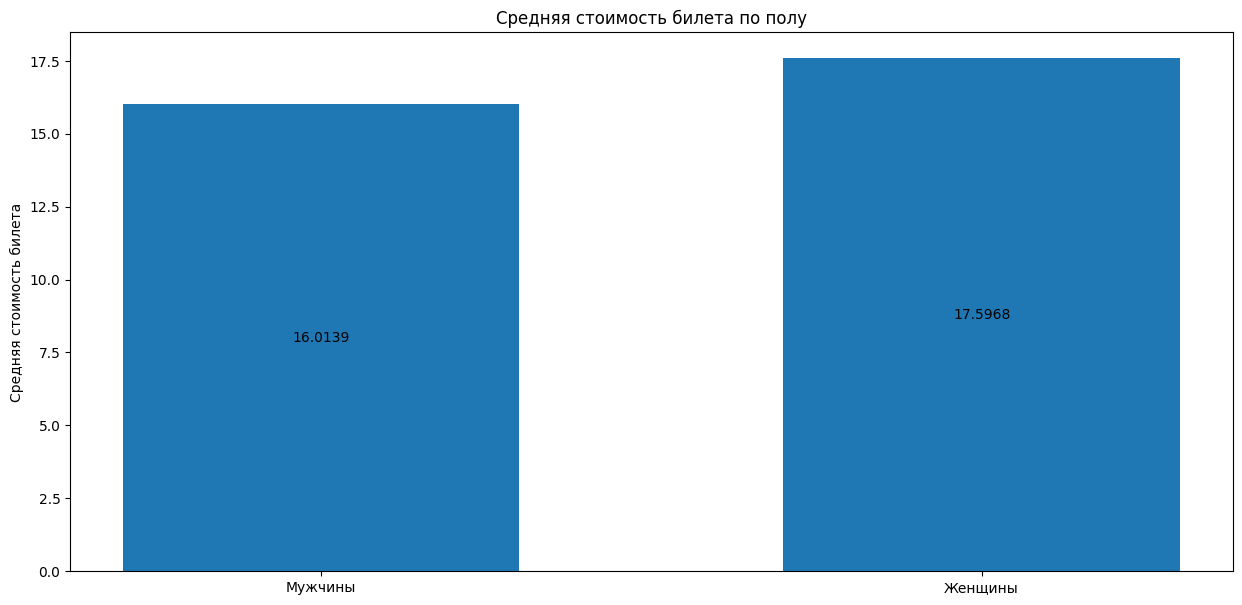

In [32]:
#проверим гипотезу: Женщины платили за билеты больше чем мужчины
average_fare_sex = df.groupby('Sex')['Fare'].mean()

sex_labels = average_fare_sex.index
avg_fare_val = average_fare_sex.values

fig, ax = plt.subplots(figsize = (15,7))

p = ax.bar(sex_labels, avg_fare_val, width=0.6)

ax.bar_label(p, label_type='center')

ax.set_title('Средняя стоимость билета по полу')
ax.set_ylabel('Средняя стоимость билета')

ax.set_xticks(ticks=[0, 1])
ax.set_xticklabels(labels=['Мужчины', 'Женщины'])

plt.show()


####Вывод

Из графика видно, что средняя стоимость билета, которые покупали женщины, на полторы единицы больше. Из этого можно сдлетаь вывод, что женщины покупали более дорогие билеты

###10 Гипотеза
Женщины чаще путешествовали с детьми, а мужчины с женами.


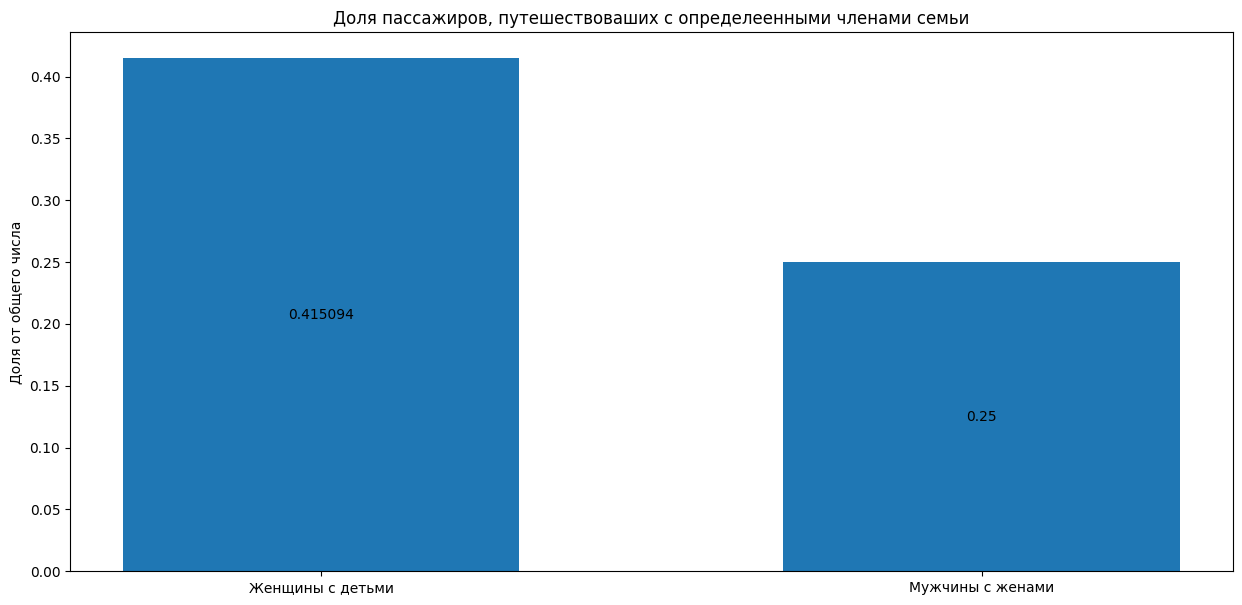

In [33]:
#Проверим гипотезу: Женщины чаще путешествовали с детьми, а мужчины с женами.
women = df[df['Sex'] == 1]
men = df[df['Sex'] == 0]

women_with_children = (women['Parch'] > 0).mean()
men_with_wifes = (men['SibSp'] > 0).mean()


labels = ['Женщины с детьми', 'Мужчины с женами']
means = [women_with_children, men_with_wifes]

fig, ax = plt.subplots(figsize = (15,7))

p = ax.bar(labels, means, width=0.6)


ax.bar_label(p, label_type='center')

ax.set_title('Доля пассажиров, путешествоваших с определеенными членами семьи')
ax.set_ylabel('Доля от общего числа')



plt.show()

####Вывод

Из графика видно, что гипотеза о том, что женщины чаще путеществлвали с детьми, чем мужчины с женами подтвердилась




###11 Гипотеза

Мужчины чаще путешествовали в одночку.

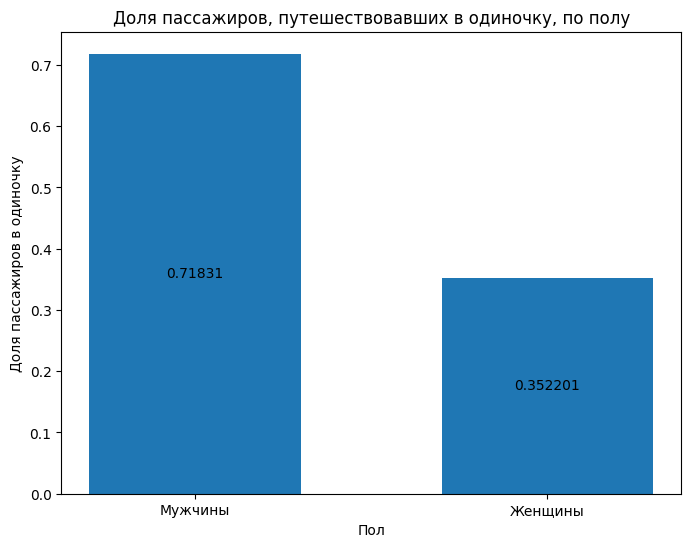

In [34]:
#Проверим гипотезу, что мужчины путешевствуют одни
df['is_alone'] = ((df['SibSp'] == 0) & (df['Parch'] == 0)).astype(int)

alone_by_sex = df.groupby('Sex')['is_alone'].mean()
sex_codes = alone_by_sex.index
prop_alone_values = alone_by_sex.values

fig, ax = plt.subplots(figsize=(8, 6))
p = ax.bar(sex_codes, prop_alone_values, width=0.6)
ax.bar_label(p, label_type='center')

ax.set_title('Доля пассажиров, путешествовавших в одиночку, по полу')
ax.set_xlabel('Пол')
ax.set_ylabel('Доля пассажиров в одиночку')
ax.set_xticks(ticks=[0, 1])
ax.set_xticklabels(labels=['Мужчины', 'Женщины'])

plt.show()

####Вывод

Из графика видно, что в среднем мужчины пости в два раза чаще путеществовали одни, чем женщины.
Гипотеза подтверждена

##Feature Importances

переделаем категориальные данные из строк в числа для большего удобства


In [35]:
df['Age_group'] = df['Age_group'].map({'0-12': 0, '13-17': 1, '18-25': 2, '26-40': 3, '41-60': 4, '61+': 5}).astype(int)
df['Fare_Bin'] = df['Fare_Bin'].map({'<10': 0, '10-15': 1, '15-20': 2, '20-25': 3, '25+': 4}).astype(int)

Проверим важность признаков на трех моделях:	XGBoost, Random Fores, Permutation importance и Logistic Regression

Разделим признаки на тестовые и тренировочные. Важность признаков будем определять на тренировочных

In [36]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###XGBoost

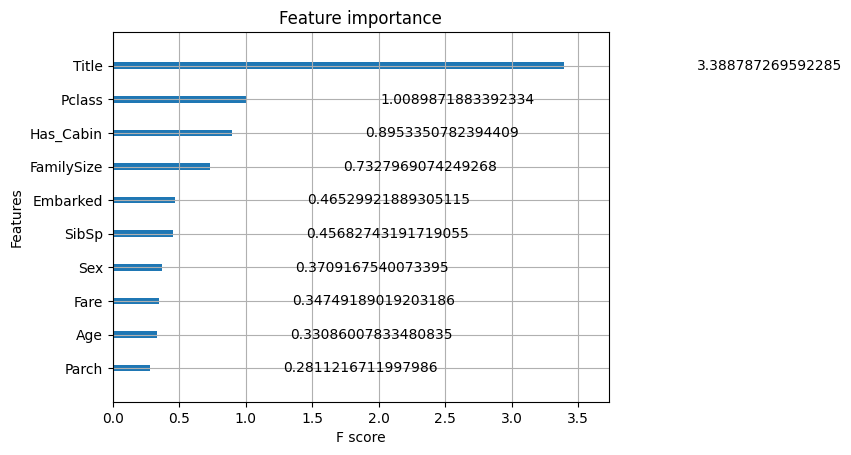

In [37]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Важность признаков (gain, weight, cover)
xgb.plot_importance(model, importance_type='gain')  # 'gain' — средний выигрыш при использовании признака
plt.show()

###Random Forest

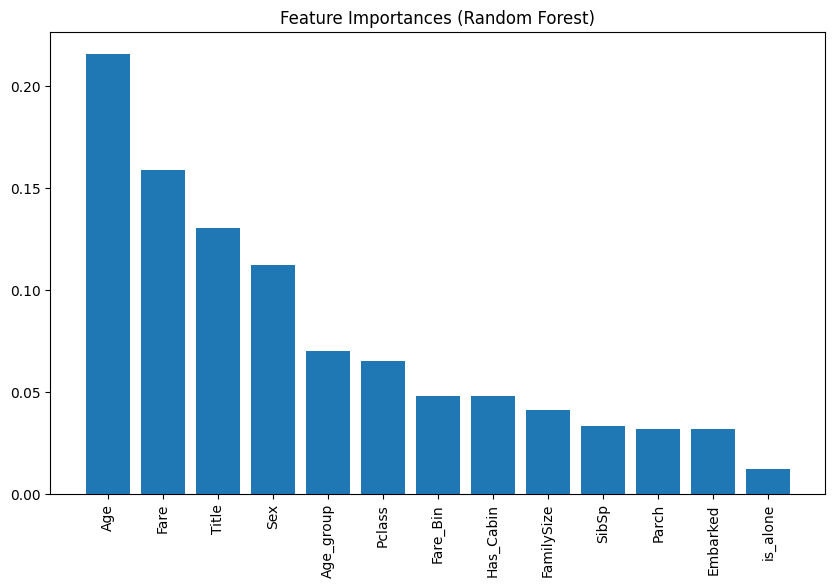

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Важность признаков
importances = model.feature_importances_
feature_names = X_train.columns

# Сортировка и визуализация
sorted_idx = importances.argsort()[::-1]  # Сортировка по убыванию
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()

###Permutation importance

<ipython-input-39-5f9a07cff9bf>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])


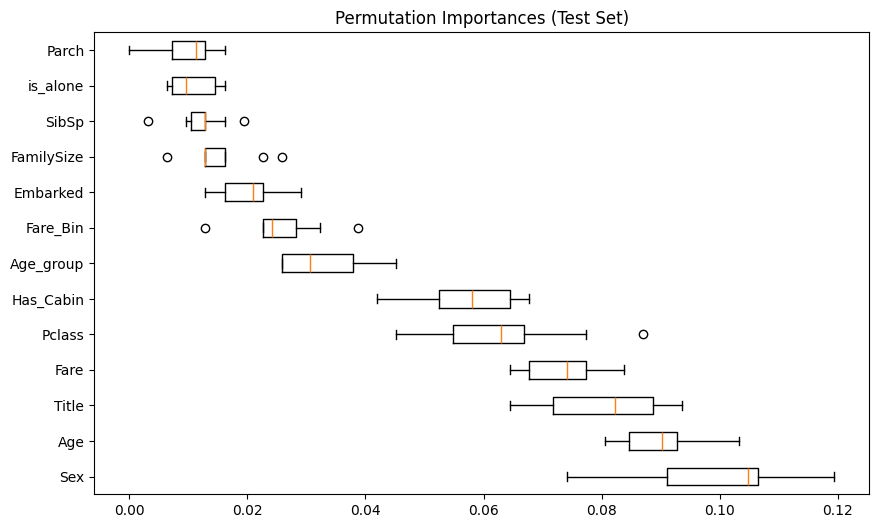

In [39]:
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_train.columns[sorted_idx])
plt.title("Permutation Importances (Test Set)")
plt.show()

###Logistic Regression


In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Коэффициенты (чем больше |coef|, тем важнее признак)
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

print(importance)

       Feature  Importance
1          Sex    1.709983
0       Pclass    1.306275
7    Has_Cabin    0.799162
8        Title    0.482084
11    Fare_Bin    0.470934
12    is_alone    0.379642
3        SibSp    0.372913
10   Age_group    0.358607
6     Embarked    0.260394
4        Parch    0.248129
5         Fare    0.141796
9   FamilySize    0.124784
2          Age    0.018348


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


на основе проведенных исследований удалим малозначительные признаки, которые скорее всего будут отрицательно влиять на модели

In [41]:
X_train_mod = X_train.drop(columns=['is_alone', 'Parch', 'SibSp', 'Embarked'])
X_test_mod = X_test.drop(columns=['is_alone', 'Parch', 'SibSp', 'Embarked'])

# Модель

для более точных результатов у моделеей и избежания переобучения нормализуем данные

In [42]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_mod_scaled = pd.DataFrame(scaler.fit_transform(X_train_mod), columns=X_train_mod.columns)
X_test_mod_scaled = pd.DataFrame(scaler.transform(X_test_mod), columns=X_test_mod.columns)

в каждой группе моделей будем использоват две: одна со всеми признаками, вторая - только с отобранными. сравним как они вляют на результат

##Линейная модель

###Модель со всеми столбцами

In [43]:
# Обучение модели
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
pred = model.predict(X_test_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_scaled):
    X_fold_train, X_fold_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_fold_train, y_fold_train)
    fold_pred = model.predict(X_fold_test)

    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

MAE 0.36
MSE 0.19
RMSE 0.44
Фолд 1: MAE 0.29, MSE 0.14, RMSE 0.37
Фолд 2: MAE 0.32, MSE 0.18, RMSE 0.43
Фолд 3: MAE 0.32, MSE 0.16, RMSE 0.40
Фолд 4: MAE 0.28, MSE 0.13, RMSE 0.37
Фолд 5: MAE 0.32, MSE 0.16, RMSE 0.40
Среднее значение кросс-валидации: 0.3297


###Модель без малозначительных признаков

In [44]:
# Обучение модели
model = LinearRegression()
model.fit(X_train_mod_scaled, y_train)

# Предсказания на тестовом наборе
pred = model.predict(X_test_mod_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_mod_scaled):
    X_fold_train, X_fold_test = X_train_mod_scaled.iloc[train_index], X_train_mod_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_fold_train, y_fold_train)
    fold_pred = model.predict(X_fold_test)

    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(model, X_train_mod_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

MAE 0.35
MSE 0.19
RMSE 0.43
Фолд 1: MAE 0.30, MSE 0.14, RMSE 0.38
Фолд 2: MAE 0.34, MSE 0.19, RMSE 0.44
Фолд 3: MAE 0.32, MSE 0.16, RMSE 0.40
Фолд 4: MAE 0.29, MSE 0.13, RMSE 0.37
Фолд 5: MAE 0.31, MSE 0.15, RMSE 0.39
Среднее значение кросс-валидации: 0.3175


###Вывод

исходя из значений ошибок, на небольшую часть лучше всё-таки линейная модель, в которой использовались отобранные признаки

##Деревья решений

###Модель со всеми столбцами

In [45]:
# Определение модели
model = DecisionTreeRegressor()

# Определение параметров для GridSearch
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [3, 6, 9],
    "min_samples_leaf": [1, 3, 5]
}

# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры и лучший MSE
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f'Лучшие параметры: {best_params}')
print(f'Лучший MSE: {best_score:.2f}')

# Обучение модели с лучшими параметрами
tree = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              min_samples_leaf=best_params['min_samples_leaf'])
tree.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
pred = tree.predict(X_test_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация с выводом метрик для каждого фолда
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_scaled):
    X_fold_train, X_fold_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    tree.fit(X_fold_train, y_fold_train)
    fold_pred = tree.predict(X_fold_test)

    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(tree, X_train_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3}
Лучший MSE: 0.16
MAE 0.30
MSE 0.19
RMSE 0.44
Фолд 1: MAE 0.22, MSE 0.13, RMSE 0.36
Фолд 2: MAE 0.28, MSE 0.17, RMSE 0.41
Фолд 3: MAE 0.29, MSE 0.20, RMSE 0.44
Фолд 4: MAE 0.25, MSE 0.14, RMSE 0.38
Фолд 5: MAE 0.24, MSE 0.14, RMSE 0.37
Среднее значение кросс-валидации: 0.3091


###Модель без малозначительных признаков

In [46]:
# Определение модели
model = DecisionTreeRegressor()

# Определение параметров для GridSearch
param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [3, 6, 9],
    "min_samples_leaf": [1, 3, 5]
}

# GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_mod_scaled, y_train)

# Лучшие параметры и лучший MSE
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f'Лучшие параметры: {best_params}')
print(f'Лучший MSE: {best_score:.2f}')

# Обучение модели с лучшими параметрами
tree = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                              min_samples_split=best_params['min_samples_split'],
                              min_samples_leaf=best_params['min_samples_leaf'])
tree.fit(X_train_mod_scaled, y_train)

# Предсказания на тестовом наборе
pred = tree.predict(X_test_mod_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация с выводом метрик для каждого фолда
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_mod_scaled):
    X_fold_train, X_fold_test = X_train_mod_scaled.iloc[train_index], X_train_mod_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    tree.fit(X_fold_train, y_fold_train)
    fold_pred = tree.predict(X_fold_test)

    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(tree, X_train_mod_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 6}
Лучший MSE: 0.15
MAE 0.30
MSE 0.19
RMSE 0.43
Фолд 1: MAE 0.23, MSE 0.14, RMSE 0.37
Фолд 2: MAE 0.29, MSE 0.17, RMSE 0.41
Фолд 3: MAE 0.29, MSE 0.20, RMSE 0.44
Фолд 4: MAE 0.26, MSE 0.14, RMSE 0.38
Фолд 5: MAE 0.21, MSE 0.12, RMSE 0.35
Среднее значение кросс-валидации: 0.3512


###Вывод

исходя из значений ошибок, на небольшую часть лучше всё-таки деревья решений, в которых использовались отобранные признаки

##Градиентный бустинг

###Модель со всеми столбцами

In [47]:
# Определение модели
grad = GradientBoostingRegressor(max_depth=6, n_estimators=50, learning_rate=0.1)

# Обучение модели на тренировочных данных
grad.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
pred = grad.predict(X_test_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация с выводом метрик для каждого фолда
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_scaled):
    X_fold_train, X_fold_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Обучение модели на текущем фолде
    grad.fit(X_fold_train, y_fold_train)
    fold_pred = grad.predict(X_fold_test)

    # Вычисление метрик для текущего фолда
    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(grad, X_train_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

MAE 0.30
MSE 0.20
RMSE 0.45
Фолд 1: MAE 0.26, MSE 0.19, RMSE 0.44
Фолд 2: MAE 0.30, MSE 0.21, RMSE 0.45
Фолд 3: MAE 0.33, MSE 0.26, RMSE 0.51
Фолд 4: MAE 0.24, MSE 0.16, RMSE 0.40
Фолд 5: MAE 0.28, MSE 0.19, RMSE 0.44
Среднее значение кросс-валидации: 0.1937


###Модель без малозначительных признаков

In [48]:
# Определение модели
grad = GradientBoostingRegressor(max_depth=6, n_estimators=50, learning_rate=0.1)

# Обучение модели на тренировочных данных
grad.fit(X_train_mod_scaled, y_train)

# Предсказания на тестовом наборе
pred = grad.predict(X_test_mod_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация с выводом метрик для каждого фолда
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_mod_scaled):
    X_fold_train, X_fold_test = X_train_mod_scaled.iloc[train_index], X_train_mod_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Обучение модели на текущем фолде
    grad.fit(X_fold_train, y_fold_train)
    fold_pred = grad.predict(X_fold_test)

    # Вычисление метрик для текущего фолда
    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(grad, X_train_mod_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

MAE 0.28
MSE 0.21
RMSE 0.46
Фолд 1: MAE 0.26, MSE 0.19, RMSE 0.43
Фолд 2: MAE 0.28, MSE 0.20, RMSE 0.45
Фолд 3: MAE 0.36, MSE 0.27, RMSE 0.52
Фолд 4: MAE 0.24, MSE 0.16, RMSE 0.40
Фолд 5: MAE 0.23, MSE 0.15, RMSE 0.39
Среднее значение кросс-валидации: 0.2056


###Вывод

исходя из значений ошибок, на небольшую часть лучше всё-таки градиентный бустинг, в котором использовались отобранные признаки

##Нейройнные сети

###Модель со всеми столбцами

In [49]:
# Определение модели
ns = MLPRegressor(hidden_layer_sizes=(100, 50, 25), random_state=44)

# Обучение модели на тренировочных данных
ns.fit(X_train_scaled, y_train)

# Предсказания на тестовом наборе
pred = ns.predict(X_test_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация с выводом метрик для каждого фолда
kf = KFold(n_splits=5, shuffle=True, random_state=44)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_scaled):
    X_fold_train, X_fold_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Обучение модели на текущем фолде
    ns.fit(X_fold_train, y_fold_train)
    fold_pred = ns.predict(X_fold_test)

    # Вычисление метрик для текущего фолда
    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(ns, X_train_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE 0.34
MSE 0.25
RMSE 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Фолд 1: MAE 0.25, MSE 0.16, RMSE 0.40
Фолд 2: MAE 0.34, MSE 0.22, RMSE 0.47
Фолд 3: MAE 0.31, MSE 0.20, RMSE 0.44
Фолд 4: MAE 0.30, MSE 0.20, RMSE 0.45
Фолд 5: MAE 0.27, MSE 0.18, RMSE 0.43


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Среднее значение кросс-валидации: 0.1408


###Модель без малозначительных признаков

In [50]:
# Определение модели
ns = MLPRegressor(hidden_layer_sizes=(100, 50, 25), random_state=44)

# Обучение модели на тренировочных данных
ns.fit(X_train_mod_scaled, y_train)

# Предсказания на тестовом наборе
pred = ns.predict(X_test_mod_scaled)

# Метрики для тестового набора
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

print(f'MAE {mae:.2f}')
print(f'MSE {mse:.2f}')
print(f'RMSE {rmse:.2f}')

# Кросс-валидация с выводом метрик для каждого фолда
kf = KFold(n_splits=5, shuffle=True, random_state=44)
fold_mae = []
fold_mse = []
fold_rmse = []

for train_index, test_index in kf.split(X_train_mod_scaled):
    X_fold_train, X_fold_test = X_train_mod_scaled.iloc[train_index], X_train_mod_scaled.iloc[test_index]
    y_fold_train, y_fold_test = y_train.iloc[train_index], y_train.iloc[test_index]

    # Обучение модели на текущем фолде
    ns.fit(X_fold_train, y_fold_train)
    fold_pred = ns.predict(X_fold_test)

    # Вычисление метрик для текущего фолда
    fold_mae.append(mean_absolute_error(y_fold_test, fold_pred))
    fold_mse.append(mean_squared_error(y_fold_test, fold_pred))
    fold_rmse.append(fold_mse[-1] ** 0.5)

# Вывод метрик для каждого фолда
for i in range(len(fold_mae)):
    print(f'Фолд {i + 1}: MAE {fold_mae[i]:.2f}, MSE {fold_mse[i]:.2f}, RMSE {fold_rmse[i]:.2f}')

# Среднее значение кросс-валидации
scores = cross_val_score(ns, X_train_mod_scaled, y_train, cv=5)
print(f'Среднее значение кросс-валидации: {scores.mean():.4f}')

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MAE 0.31
MSE 0.21
RMSE 0.45


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Фолд 1: MAE 0.28, MSE 0.16, RMSE 0.40
Фолд 2: MAE 0.33, MSE 0.23, RMSE 0.47
Фолд 3: MAE 0.27, MSE 0.15, RMSE 0.38
Фолд 4: MAE 0.27, MSE 0.14, RMSE 0.37
Фолд 5: MAE 0.26, MSE 0.15, RMSE 0.39


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Среднее значение кросс-валидации: 0.2713


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


###Вывод

исходя из значений ошибок, на небольшую часть лучше всё-таки нейроные сети, в которых использовались отобранные признаки

##Общий вывод

1. Значения линейной модели:
* MAE 0.35
* MSE 0.19
* RMSE 0.43

2. Значения деревьей решений:
* MAE 0.30
* MSE 0.19
* RMSE 0.43

3. Значения градиентного бустинга:
* MAE 0.28
* MSE 0.20
* RMSE 0.45

4. Значения нейронный сетей:
* MAE 0.31
* MSE 0.21
* RMSE 0.45

Из показатей мы можем сделать вывод, что лучше всех себя показал градиентный бустинг.

Самое лучшее значение средней кросс-валидации у градиентного бустинга: 0.2104